In [2]:
import pandas as pd
import wfdb
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
def load_raw_data(df, path):
    filenames = df['Filename']
    data = [wfdb.rdsamp(path + f)[0] for f in filenames]
    return data


In [4]:
def load_Diag(df, path):
    Dissess_Diag = []
    ECG_Diag = []
    for filename in df['Filename']:
        record = wfdb.rdrecord(path + filename)
        message = record.comments
        Dissess_Diag.append(message[1])
        ECG_Diag.append(message[2])
    return Dissess_Diag, ECG_Diag

In [5]:
path = '/path/to/database/'
# load CSV
Y = pd.read_csv(path + 'AttributesDictionary.csv')
Y

Filename      ECG_ID Patient_ID    Age    Gender  \
0      P00/P00001/P00001_E01  P00001_E01     P00001   572d  'Female'   
1      P00/P00002/P00002_E01  P00002_E01     P00002  4327d    'Male'   
2      P00/P00003/P00003_E01  P00003_E01     P00003  1087d  'Female'   
3      P00/P00004/P00004_E01  P00004_E01     P00004  2465d    'Male'   
4      P00/P00004/P00004_E02  P00004_E02     P00004  2461d    'Male'   
...                      ...         ...        ...    ...       ...   
14185  P11/P11639/P11639_E01  P11639_E01     P11639  2646d    'Male'   
14186  P11/P11640/P11640_E01  P11640_E01     P11640   657d    'Male'   
14187  P11/P11641/P11641_E01  P11641_E01     P11641  1484d  'Female'   
14188  P11/P11642/P11642_E01  P11642_E01     P11642  5178d    'Male'   
14189  P11/P11643/P11643_E01  P11643_E01     P11643  3146d    'Male'   

          Acquisition_date  Sampling_point  Lead  \
0      2017-11-22 10:46:08            9000     9   
1      2017-11-28 21:59:47           15000    12   
2      2017-11-29 16:04:57           10000    12   
3      2017-11-30 15:21:27           13000     9   
4      2017-11-26 19:19:48           15000     9   
...                    ...             ...   ...   
14185  2021-06-24 18:22:31           10000    12   
14186  2021-07-01 09:47:16           10500    12   
14187  2021-07-04 21:58:36           15000    12   
14188  2021-06-27 20:22:00           15000    12   
14189  2021-06-25 18:20:18           15000    12   

                                     AHA_code          CHN_code  \
0      'Left ventricular high voltage';'L147'     'J106';'L123'   
1                                       'C21'             'C13'   
2                                       'C21'             'C13'   
3                                       'C21'             'C13'   
4                                        'A1'              'A1'   
...                                       ...               ...   
14185                                    'A1'              'A1'   
14186                            'C21';'L147'      'C13';'L123'   
14187                       'D30+Modifier310'    'D21+Frequent'   
14188                            'C23';'L150'      'C15';'L128'   
14189                       'F60+Modifier308'  'F55+Occasional'   

                                   ICD-10 code  \
0                      'I34.0';'Q21.0';'Q24.9'   
1                              'I51.4';'J18.9'   
2                              'Q21.0';'Q24.9'   
3                              'Q21.1';'Q24.9'   
4                              'Q21.1';'Q24.9'   
...                                        ...   
14185                                  'J35.3'   
14186  'S02.0';'S06.5';'S06.6';'S06.7';'T14.0'   
14187                            'I49.1';'R53'   
14188                  'J31.0';'J34.2';'S02.2'   
14189                          'G04.8';'J94.8'   

                                                    pSQI  \
0      'I':0.288;'II':0.323;'III':0.346;'aVR':0.312;'...   
1      'I':0.472;'II':0.446;'III':0.449;'aVR':0.484;'...   
2      'I':0.495;'II':0.347;'III':0.340;'aVR':0.382;'...   
3      'I':0.340;'II':0.405;'III':0.409;'aVR':0.350;'...   
4      'I':0.501;'II':0.494;'III':0.389;'aVR':0.525;'...   
...                                                  ...   
14185  'I':0.330;'II':0.422;'III':0.387;'aVR':0.377;'...   
14186  'I':0.284;'II':0.362;'III':0.378;'aVR':0.332;'...   
14187  'I':0.387;'II':0.387;'III':0.411;'aVR':0.384;'...   
14188  'I':0.401;'II':0.409;'III':0.409;'aVR':0.407;'...   
14189  'I':0.395;'II':0.500;'III':0.605;'aVR':0.442;'...   

                                                  basSQI  \
0      'I':0.994;'II':0.996;'III':0.991;'aVR':0.997;'...   
1      'I':0.995;'II':0.980;'III':0.992;'aVR':0.992;'...   
2      'I':0.915;'II':0.895;'III':0.882;'aVR':0.908;'...   
3      'I':0.981;'II':0.988;'III':0.974;'aVR':0.986;'...   
4      'I':0.993;'II':0.993;'III':0.989;'aVR':0.995;'...   
...                                        

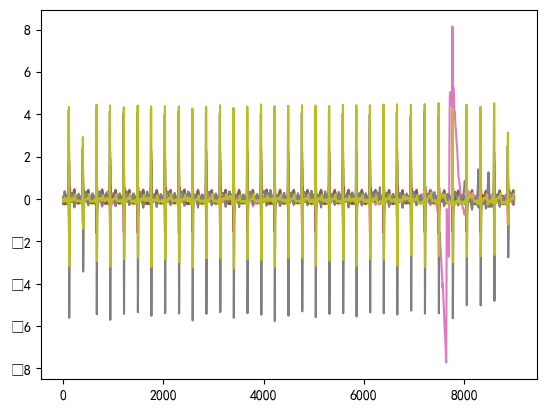

In [15]:
import matplotlib.pyplot as plt
# load row signal data
X = load_raw_data(Y, path)
data = X[0].T
for i in range(data.shape[0]):
    plt.plot(data[i])

In [14]:
import warnings
warnings.filterwarnings("ignore")
from sqi_score.ecg_qc.ecg_qc import EcgQc  # https://github.com/Aura-healthcare/ecg_qc
from biosppy.signals import ecg
import neurokit2 as nk
def get_rpeaks(signal, sample_rate=100, method="nabian2018"):
    _, info = nk.ecg_peaks(signal, sampling_rate=sample_rate, method=method, correct_artifacts=False)
    rpeaks = info['ECG_R_Peaks']
    return rpeaks
sqi = []
bsqi = []
for item in range(data.shape[0]):
    rpeaks1 = get_rpeaks(data[item], sample_rate=100, method='nabian2018')
    rpeaks2 = get_rpeaks(data[item], sample_rate=100, method='promac')
    bSQI = ecg.bSQI(rpeaks1,rpeaks2,fs=100)
    bsqi.append(bSQI)
    ecg_list = data[item].tolist()
    flattened_ecg = np.ravel(ecg_list)
    warnings.filterwarnings("ignore")
    ecg_qc = EcgQc('rfc_norm_2s.pkl', sampling_frequency=500, normalized=True)
    sqi_scores = np.array(ecg_qc.compute_sqi_scores(flattened_ecg))
    sqi.append(sqi_scores[0])
sqi = np.array(sqi)
bsqi = np.array(bsqi)
mean_sqi = np.mean(sqi,axis=0)
mean_bsqi = np.mean(bsqi,axis=0)
print('The quality of signal: pSQI = {:.3f}, basSQI = {:.3f}, bSQI = {:.3f}'.format(mean_sqi[4], mean_sqi[5], mean_bsqi))

The quality of signal: pSQI = 0.318, basSQI = 0.997, bSQI = 100.000


In [19]:
# load Disease_Diag and ECG_Diag
Disease_Diag, ECG_Diag = load_Diag(Y, path)
Disease_Diag, ECG_Diag

(['Ventricular septal defect',
  'Myocarditis',
  'Ventricular septal defect',
  'Atrial septal defect',
  'Atrial septal defect',
  'Atrial septal defect',
  'Atrial septal defect',
  'Ventricular septal defect',
  'Ventricular septal defect',
  'Ventricular septal defect',
  'Atrial septal defect',
  'Dilated cardiomyopathy',
  'Dilated cardiomyopathy',
  'Dilated cardiomyopathy',
  'Dilated cardiomyopathy',
  'Atrial septal defect',
  'Ventricular septal defect',
  'Pulmonary value stenosis',
  'Myocarditis',
  'Atrial septal defect',
  'Dilated cardiomyopathy',
  'Dilated cardiomyopathy',
  'Ventricular septal defect',
  'Atrial septal defect',
  'Ventricular septal defect;Atrial septal defect',
  'Kawasaki disease',
  'Dilated cardiomyopathy',
  'Dilated cardiomyopathy',
  'Dilated cardiomyopathy',
  'Atrial septal defect (Secondary orifice)',
  'Patent ductus arteriosus',
  'Central atrial septal defect (Foramen ovale)',
  'Patent ductus arteriosus',
  'Ventricular septal defect'

In [20]:
# Split data into train val and test
# Get unique Patient_ID values
patient_ids = Y['Patient_ID'].unique()

# Split Patient_IDs into training, validation, and test sets
train_ids, test_ids = train_test_split(patient_ids, test_size=0.2, random_state=42)
train_ids, val_ids = train_test_split(train_ids, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Get indices for training, validation, and test sets based on Patient_ID
train_idx = Y[Y['Patient_ID'].isin(train_ids)].index
val_idx = Y[Y['Patient_ID'].isin(val_ids)].index
test_idx = Y[Y['Patient_ID'].isin(test_ids)].index

# Split X into training, validation, and test sets based on the indices
# Train
X_train = [X[i] for i in train_idx]
Y_train = [Disease_Diag[i] for i in train_idx]
# val
X_val = [X[i] for i in val_idx]
Y_val = [Disease_Diag[i] for i in val_idx]
# test
X_test = [X[i] for i in test_idx]
Y_test = [Disease_Diag[i] for i in test_idx]
print(f'The training set has {len(X_train)} records')
print(f'The val set has {len(X_val)} records')
print(f'The test set has {len(X_test)} records')

The training set has 8486 records
The val set has 2857 records
The test set has 2847 records
